In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

x = np.array([8.093607318, 3.365731514])

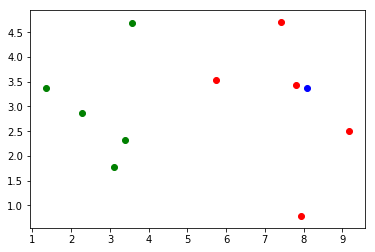

In [3]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='r')
plt.scatter(x[0], x[1], color='b')

In [4]:
distances = []
for item in raw_data_X:
    dist = np.sum(np.square(item - x))
    distances.append(np.sqrt(dist))
print(distances)

for label, value in zip(raw_data_y,distances):
    print(label, '    ' ,value)

[4.812566907609877, 5.229270827235305, 6.749798999160064, 4.6986266144110695, 5.83460014556857, 1.4900114024329525, 2.354574897431513, 1.3761132675144652, 0.3064319992975, 2.5786840957478887]
0      4.812566907609877
0      5.229270827235305
0      6.749798999160064
0      4.6986266144110695
0      5.83460014556857
1      1.4900114024329525
1      2.354574897431513
1      1.3761132675144652
1      0.3064319992975
1      2.5786840957478887


In [5]:
rank = np.argsort(distances)

print(rank)

[8 7 5 6 9 3 0 1 4 2]


In [8]:
k = 6

topK_y = [raw_data_y[i] for i in rank[:k]]
print(topK_y)

[1, 1, 1, 1, 1, 0]


In [13]:
votes = Counter(topK_y)
print(votes)
votes.most_common(1)[0][0]

Counter({1: 5, 0: 1})


1

封装KNN算法

In [15]:
from sklearn.neighbors import KNeighborsClassifier

kNN_classifier = KNeighborsClassifier(n_neighbors=6)
kNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [17]:
X_predict = x.reshape(1, -1)
kNN_classifier.predict(X_predict)[0]

1

KNN

In [28]:

class KNNClassifier:
    def __init__(self, k):
        
        assert k >=1, "K must be valid"
        self.k = k 
        self._X_train = None
        self._y_train = None
    
    def fit(self, X_train , y_train):
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"
        assert self.k <= X_train.shape[0], \
            "the size of X_train must be at least k."
        
        self._X_train = X_train
        self._y_train = y_train
        
        return self
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
                "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
                "the feature number of X_predict must be equal to X_train"
        
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self, x):
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"
        
        distances = [sqrt(np.sum((x_train - x) ** 2))
                     for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]
    def __repr__(self):
        return "KNN(k=%d)" % self.k

In [19]:
from sklearn import datasets

digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

最值归一化

In [20]:
x= np.random.randint(0, 100, size=100)
x

array([37, 33, 69, 44, 92, 97, 11, 13, 50, 12, 55, 77, 72, 57, 10,  2, 98,
       20, 50, 64, 53, 82, 53, 92, 10, 25, 87, 58, 72, 35,  0,  0, 72,  1,
       20, 83, 21,  5, 34, 33, 69, 14, 52, 17, 49, 79, 60, 88, 52, 18, 80,
       96, 43, 13, 72, 19, 79, 92, 79, 16, 11, 67, 87, 39,  9,  6, 27, 64,
        7, 25, 82, 65, 14,  9, 32, 52, 39, 98, 61, 24, 10, 28, 43, 96, 10,
       80, 46, 38, 18,  2, 49,  7, 61,  8, 70, 84, 46, 44, 36,  7])

In [21]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.37755102, 0.33673469, 0.70408163, 0.44897959, 0.93877551,
       0.98979592, 0.1122449 , 0.13265306, 0.51020408, 0.12244898,
       0.56122449, 0.78571429, 0.73469388, 0.58163265, 0.10204082,
       0.02040816, 1.        , 0.20408163, 0.51020408, 0.65306122,
       0.54081633, 0.83673469, 0.54081633, 0.93877551, 0.10204082,
       0.25510204, 0.8877551 , 0.59183673, 0.73469388, 0.35714286,
       0.        , 0.        , 0.73469388, 0.01020408, 0.20408163,
       0.84693878, 0.21428571, 0.05102041, 0.34693878, 0.33673469,
       0.70408163, 0.14285714, 0.53061224, 0.17346939, 0.5       ,
       0.80612245, 0.6122449 , 0.89795918, 0.53061224, 0.18367347,
       0.81632653, 0.97959184, 0.43877551, 0.13265306, 0.73469388,
       0.19387755, 0.80612245, 0.93877551, 0.80612245, 0.16326531,
       0.1122449 , 0.68367347, 0.8877551 , 0.39795918, 0.09183673,
       0.06122449, 0.2755102 , 0.65306122, 0.07142857, 0.25510204,
       0.83673469, 0.66326531, 0.14285714, 0.09183673, 0.32653

In [25]:
X2 = np.random.randint(0,  100, (50, 2))
X2 = np.array(X2,dtype=float)

In [26]:
X2[:, 0] = (X2[:,0] - np.mean(X2[:,0]) ) /np.std(X2[:, 0])
X2[:, 1] = (X2[:,1] - np.mean(X2[:,1]) ) /np.std(X2[:, 1])

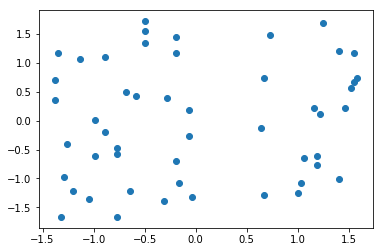

In [27]:
plt.scatter(X2[:,0],X2[:,1])
plt.show()

In [29]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [31]:
from sklearn.preprocessing import StandardScaler
standarScaler = StandardScaler()

In [32]:
standarScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
standarScaler.mean_

array([5.83839286, 3.06517857, 3.77142857, 1.21875   ])

In [34]:
X_train = standarScaler.transform(X_train)